In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your selected_train folder inside Drive
data_dir = '/content/drive/MyDrive/Project/selected_train'

# Image parameters
img_size = 28

# Labels A-Y excluding J and Z
valid_labels = [chr(i) for i in range(ord('A'), ord('Z')+1) if i not in [ord('J'), ord('Z')]]
label_to_int = {char: idx for idx, char in enumerate(valid_labels)}  # A=0, B=1, ..., Y=23

data = []

for label_char in tqdm(valid_labels, desc="Processing folders"):
    folder_path = os.path.join(data_dir, label_char)
    if not os.path.isdir(folder_path):
        print(f"Skipping missing folder: {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, filename)

            # Read in grayscale
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            # Resize to 28x28
            img = cv2.resize(img, (img_size, img_size))

            # Flatten and store
            img_flat = img.flatten()
            label = label_to_int[label_char]
            data.append([label] + img_flat.tolist())

# Convert to CSV format
columns = ['label'] + [f'pixel{i}' for i in range(img_size * img_size)]
df = pd.DataFrame(data, columns=columns)

df = df.sample(frac=1).reset_index(drop=True)

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save to Google Drive
output_path = '/content/drive/MyDrive/project/selected_train.csv'
df.to_csv(output_path, index=False)
print(f"CSV saved at: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing folders: 100%|██████████| 24/24 [00:04<00:00,  5.31it/s]


CSV saved at: /content/drive/MyDrive/project/selected_train.csv


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load custom dataset
custom_path = '/content/sign_mnist_train.csv'
custom_df = pd.read_csv(custom_path)
print(f"Loaded custom dataset with {len(custom_df)} samples")

# Step 2: Find the minimum count per label
label_counts = custom_df['label'].value_counts()
min_count = label_counts.min()
print("Label distribution in custom dataset:\n", label_counts)
print(f"🔍 Lowest occurring label has {min_count} samples")

# Step 3: Load MNIST CSV
mnist_df = pd.read_csv('/content/drive/MyDrive/project/selected_train.csv')  # Adjust path if needed
print(f"Loaded MNIST dataset with {len(mnist_df)} samples")

# Step 4: For each label in MNIST, sample min_count examples
mnist_balanced_parts = []
unique_labels = sorted(mnist_df['label'].unique())

for label in unique_labels:
    label_df = mnist_df[mnist_df['label'] == label]
    if len(label_df) >= min_count:
        sampled = label_df.sample(n=min_count, random_state=42)
    else:
        sampled = label_df  # If label doesn't have enough, take all (can be oversampled if you prefer)
    mnist_balanced_parts.append(sampled)

mnist_balanced_df = pd.concat(mnist_balanced_parts, ignore_index=True)
print(f"Created balanced MNIST portion with {len(mnist_balanced_df)} rows")

# Step 5: Combine both datasets
combined_df = pd.concat([custom_df, mnist_balanced_df], ignore_index=True)

# Step 6: Shuffle & Save
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
output_path = '/content/drive/MyDrive/project/extended_selected_train.csv'
combined_df.to_csv(output_path, index=False)

print(f"Final dataset saved with {len(combined_df)} rows to {output_path}")


Loaded custom dataset with 27455 samples
Label distribution in custom dataset:
 label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64
🔍 Lowest occurring label has 957 samples
Loaded MNIST dataset with 936 samples
Created balanced MNIST portion with 936 rows
Final dataset saved with 28391 rows to /content/drive/MyDrive/project/extended_selected_train.csv


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load custom dataset
custom_path = '/content/sign_mnist_test.csv'
custom_df = pd.read_csv(custom_path)
print(f"Loaded custom dataset with {len(custom_df)} samples")

# Step 2: Find the minimum count per label
label_counts = custom_df['label'].value_counts()
min_count = label_counts.min()
print("Label distribution in custom dataset:\n", label_counts)
print(f"🔍 Lowest occurring label has {min_count} samples")

# Step 3: Load MNIST CSV
mnist_df = pd.read_csv('/content/drive/MyDrive/project/selected_test.csv')  # Adjust path if needed
print(f"Loaded MNIST dataset with {len(mnist_df)} samples")

# Step 4: For each label in MNIST, sample min_count examples
mnist_balanced_parts = []
unique_labels = sorted(mnist_df['label'].unique())

for label in unique_labels:
    label_df = mnist_df[mnist_df['label'] == label]
    if len(label_df) >= min_count:
        sampled = label_df.sample(n=min_count, random_state=42)
    else:
        sampled = label_df  # If label doesn't have enough, take all (can be oversampled if you prefer)
    mnist_balanced_parts.append(sampled)

mnist_balanced_df = pd.concat(mnist_balanced_parts, ignore_index=True)
print(f"Created balanced MNIST portion with {len(mnist_balanced_df)} rows")

# Step 5: Combine both datasets
combined_df = pd.concat([custom_df, mnist_balanced_df], ignore_index=True)

# Step 6: Shuffle & Save
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
output_path = '/content/drive/MyDrive/project/extended_selected_test.csv'
combined_df.to_csv(output_path, index=False)

print(f"Final dataset saved with {len(combined_df)} rows to {output_path}")

Loaded custom dataset with 7172 samples
Label distribution in custom dataset:
 label
4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
10    331
0     331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: count, dtype: int64
🔍 Lowest occurring label has 144 samples
Loaded MNIST dataset with 116 samples
Created balanced MNIST portion with 116 rows
Final dataset saved with 7288 rows to /content/drive/MyDrive/project/extended_selected_test.csv


In [ ]:
#Training Dataset
import pandas as pd

# Load the dataset"
df = pd.read_csv("/content/sign_mnist_train.csv")

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862 entries, 0 to 14861
Columns: 785 entries, label to pixel784
dtypes: float64(344), int64(441)
memory usage: 89.0 MB


(None,
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...     207.0     207.0     207.0     207.0     206.0     206.0   
 1     158  ...      69.0     149.0     128.0      87.0      94.0     163.0   
 2     187  ...     202.0     201.0     200.0     199.0     198.0     199.0   
 3     210  ...     235.0     234.0     233.0     231.0     230.0     226.0   
 4     185  ...      92.0     105.0     105.0     108.0     133.0     163.0   
 
    pixel781  pixel782  pixel783  pixel784  
 0     2

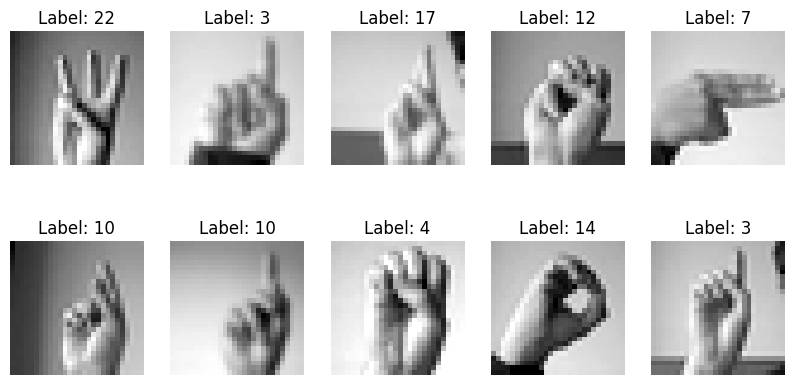

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and pixel values
labels = df["label"].values
images = df.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28 images

# Display some random images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(images))  # Random index
    axes[i].imshow(images[idx], cmap="gray")
    axes[i].set_title(f"Label: {labels[idx]}")
    axes[i].axis("off")

plt.show()


label
0     605
1     563
2     638
3     653
4     541
5     642
6     604
7     548
8     651
10    605
11    662
12    540
13    614
14    640
15    588
16    686
17    688
18    652
19    645
20    622
21    594
22    649
23    638
24    594
Name: count, dtype: int64


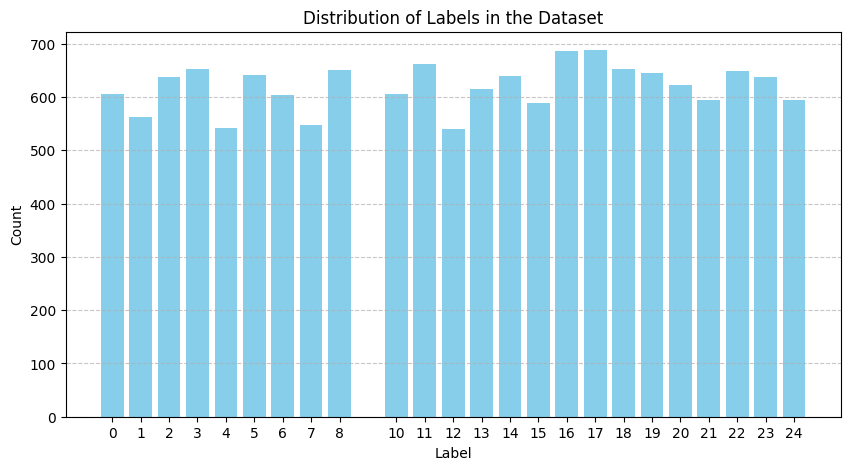

In [ ]:
class_distribution = df["label"].value_counts().sort_index()

# Display distribution
print(class_distribution)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.index, class_distribution.values, color="skyblue")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in the Dataset")
plt.xticks(class_distribution.index)  # Ensure all labels are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - accuracy: 0.2559 - loss: 2.4913 - val_accuracy: 0.8755 - val_loss: 0.4991
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7518 - loss: 0.7560 - val_accuracy: 0.9680 - val_loss: 0.1527
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.8624 - loss: 0.3986 - val_accuracy: 0.9960 - val_loss: 0.0575
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9204 - loss: 0.2454 - val_accuracy: 0.9982 - val_loss: 0.0276
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9350 - loss: 0.1927 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9491 - loss: 0.1508 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.9618 - loss: 0.1115 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9631 - loss: 0.1024 - 

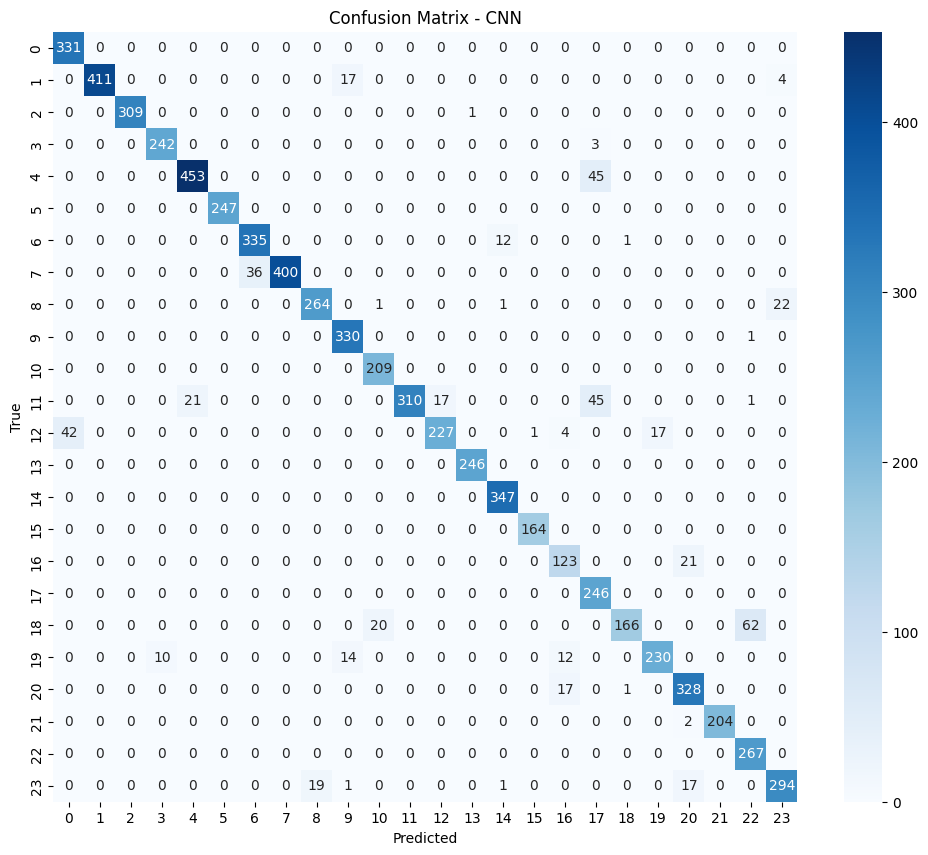

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load datasets
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

# Extract features and labels
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

# One-hot encode labels
num_classes = 25
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8868 - loss: 0.3675
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9840 - loss: 0.0507
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0330
Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1062 - loss: 3.0886 - val_accuracy: 0.4505 - val_loss: 2.3399
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3154 - loss: 2.3809 - val_accuracy: 0.5426 - val_loss: 1.9881
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4005 - loss: 2.1042 - val_accuracy: 0.5808 - val_loss: 1.7918
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4506 - loss: 1.9409 - val_accuracy: 0.6100 - val_loss: 1.6578
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4662 - loss: 1.8582 - val_accuracy: 0.6151 - val_loss: 1.5589
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4741 - loss: 1.7928 - val_accuracy: 0.6

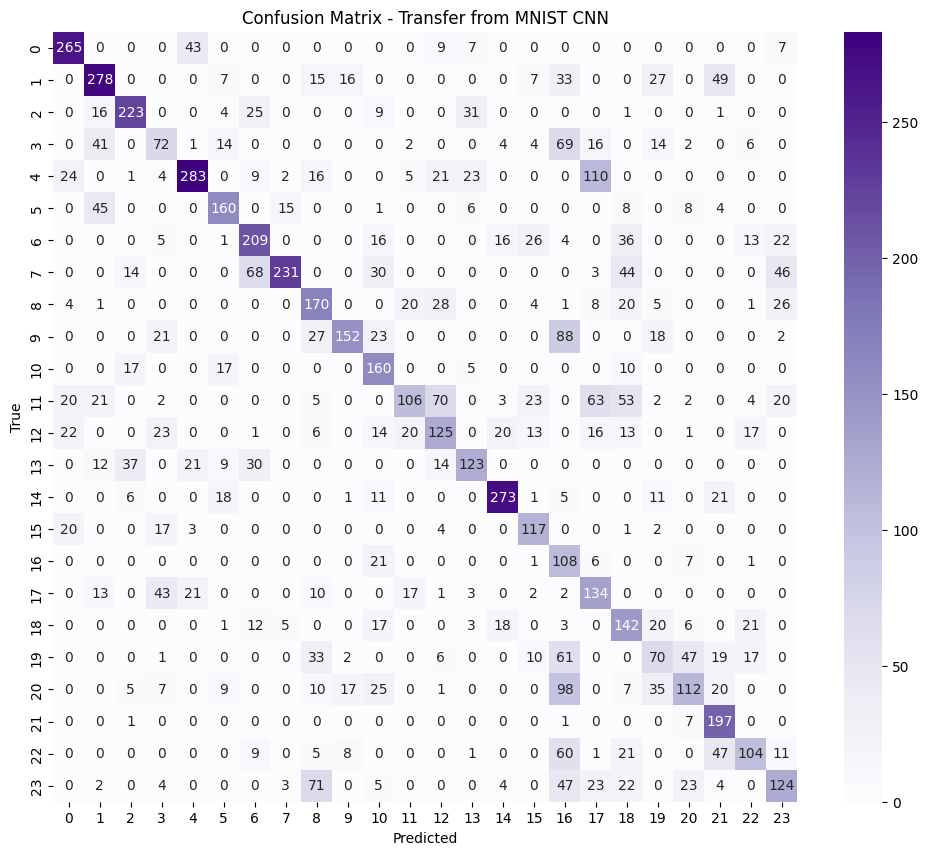

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load and prepare MNIST
(x_mnist, y_mnist), (_, _) = tf.keras.datasets.mnist.load_data()
x_mnist = x_mnist.reshape(-1, 28, 28, 1) / 255.0
y_mnist_cat = to_categorical(y_mnist, 10)

# Build base CNN using Functional API
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
features = Dense(128, activation='relu', name="features")(x)
output = Dense(10, activation='softmax')(features)

mnist_model = Model(inputs=inputs, outputs=output)
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train on MNIST
mnist_model.fit(x_mnist, y_mnist_cat, epochs=3, batch_size=64)

# STEP 2: Extract feature layers and freeze
feature_extractor = Model(inputs=mnist_model.input, outputs=mnist_model.get_layer("features").output)
feature_extractor.trainable = False  # Freeze the base model

# STEP 3: Load Sign Language MNIST
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

num_classes = 25
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# STEP 4: Build transfer model
x = feature_extractor.output
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)
transfer_model = Model(inputs=feature_extractor.input, outputs=output)

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train on Sign Language MNIST
transfer_model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# STEP 5: Evaluate
test_loss, test_acc = transfer_model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Metrics
y_pred = transfer_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Transfer from MNIST CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.0803 - loss: 3.1734 - val_accuracy: 0.1741 - val_loss: 2.7900
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2352 - loss: 2.4569 - val_accuracy: 0.3955 - val_loss: 1.9387
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3938 - loss: 1.9247 - val_accuracy: 0.5652 - val_loss: 1.3133
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5291 - loss: 1.4308 - val_accuracy: 0.6635 - val_loss: 1.0622
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6214 - loss: 1.1462 - val_accuracy: 0.7170 - val_loss: 0.8306
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7031 - loss: 0.8892 - val_accuracy: 0.8369 - val_loss: 0.5004
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7822 - loss: 0.6392 - val_accuracy: 0.8642 - val_loss: 0.4212
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8276 - loss: 0.5214 - val_accuracy: 

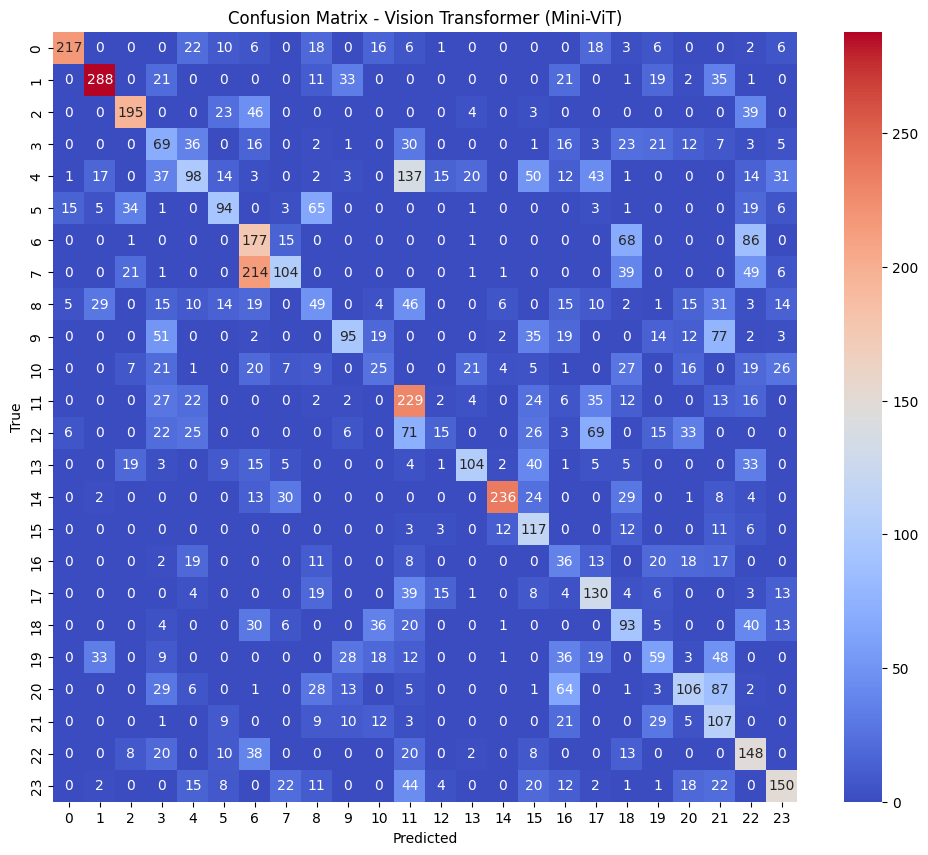

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LayerNormalization, MultiHeadAttention, Dropout, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding, Reshape, Conv2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

num_classes = 25
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Patch creation layer
class PatchExtractor(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Transformer Encoder block
def transformer_encoder(x, num_heads, ff_dim, dropout=0.1):
    # Layer norm 1
    x1 = LayerNormalization(epsilon=1e-6)(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x1, x1)
    x2 = Dropout(dropout)(attn_output)
    x = x + x2

    # Layer norm 2
    x1 = LayerNormalization(epsilon=1e-6)(x)
    ff_output = Dense(ff_dim, activation='relu')(x1)
    ff_output = Dense(x.shape[-1])(ff_output)
    x2 = Dropout(dropout)(ff_output)
    return x + x2

# Build ViT model
def build_vit(input_shape=(28, 28, 1), patch_size=4, num_heads=2, ff_dim=64, num_blocks=2, num_classes=25): # Change num_classes to 25
    inputs = Input(shape=input_shape)
    patches = PatchExtractor(patch_size)(inputs)

    # Linear projection
    x = Dense(ff_dim)(patches)

    # Add transformer blocks
    for _ in range(num_blocks):
        x = transformer_encoder(x, num_heads, ff_dim)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Now outputs (None, 25)
    return Model(inputs, outputs)

# Create and compile
vit_model = build_vit()
vit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
vit_model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = vit_model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = vit_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Vision Transformer (Mini-ViT)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
